# Project Description

# Overview

Introduction:

This problem in hand involves predicting the approval status of loan applications based on applicant details. The dataset provided contains various variables that capture essential information about the applicants, such as their income, credit history, education, and demographic characteristics. By analyzing these variables, we have to develop a model that accurately predicts whether a loan application will be approved or not.

The main objective of this project is to build a predictive model for predicting bank application status. By manipulating the provided dataset and the applicant details, the goal is to develop a model which can effectively analyze the independent variables and make reliable predictions regarding the loan approval status. This model can help financial institutions make informed decisions, streamline their loan approval processes, and mitigate the risks associated with lending.

By understanding the dataset and the objective of the project, we will proceed with the subsequent steps, such as data preprocessing, exploratory data analysis, model selection, training, evaluation, optimization, and conclusion.

So let's start by importing necessary libraries first.

# Importing Necessary Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Importing Dataset

Dataset Description:The dataset which is used in this project to perform the tasks can be accessed from the following link: https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

    
Column Description: Here we will explain the variables present in the dataset and their relevance in the prediction.

1. Loan_ID: This variable serves as a unique identifier for each loan application. While it doesn't directly contribute to the loan approval prediction, it helps in tracking and identifying individual loan applications.

2. Gender: Gender can potentially influence the loan approval decision. Lenders might consider gender as a factor while assessing the applicant's risk profile, as certain demographics may have different financial behaviors or income levels.

3. Married: Marital status is often a significant factor in loan approval decisions. Being married may indicate stability and shared financial responsibility, which could be viewed positively by lenders.

4. Dependents: The number of dependents an applicant has can impact their financial obligations and repayment capacity. More dependents might indicate higher financial responsibilities, which lenders consider when assessing the applicant's ability to repay the loan.

5. Education: Education level can be an indicator of an individual's income potential and financial stability. Applicants with higher levels of education may have better job prospects, potentially influencing their loan approval chances.

6. Self_Employed: Self-employment status can affect loan approval. Lenders may consider the stability and reliability of self-employed individuals' income sources differently compared to salaried applicants.

7. ApplicantIncome: The income level of the applicant is a crucial factor in loan approval. Higher income generally indicates a greater ability to repay the loan, reducing the risk for the lender.

8. CoapplicantIncome: The income of co-applicants can supplement the applicant's income and increase their combined repayment capacity, potentially influencing the loan approval decision.

9. Loan_Amount: The loan amount requested is directly relevant to the loan approval prediction. Lenders assess the loan amount relative to the applicant's income and financial situation to determine if it is reasonable and manageable.

10. Loan_Amount_Term: The loan amount term represents the duration in which the loan is availed. Longer loan terms might impact the applicant's repayment capability and the associated risk for the lender.

11. Credit_History: Credit history is a critical variable in loan approval predictions. It indicates the applicant's past track record of repaying debts and demonstrates their financial responsibility. A positive credit history is typically preferred by lenders.

12. Property_Area: The property area provides insights into the location and potential value of the property being financed. Different areas may have varying levels of economic stability and market conditions that can influence loan approval decisions.

13. Loan_Status: This is the target variable we aim to predict. It indicates whether the loan application was approved (Y) or not (N). The loan status directly reflects the outcome we want to predict, and all the other variables are considered in relation to this outcome.

Now lets import dataset for further steps.

In [2]:
df= pd.read_csv("loan_predict")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.set_index('Loan_ID', inplace= True)
print(df)

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001003    Male     Yes          1      Graduate            No   
LP001005    Male     Yes          0      Graduate           Yes   
LP001006    Male     Yes          0  Not Graduate            No   
LP001008    Male      No          0      Graduate            No   
...          ...     ...        ...           ...           ...   
LP002978  Female      No          0      Graduate            No   
LP002979    Male     Yes         3+      Graduate            No   
LP002983    Male     Yes          1      Graduate            No   
LP002984    Male     Yes          2      Graduate            No   
LP002990  Female      No          0      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                           

In [4]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis(EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

Let's start with checking the dimension of the dataset using df.shape attribute, then we will be seeing df.columns and df.dtypes attributes to check the columns and their datatypes, which will be followed by isnull().sum() function which will check the missing data present in each column of the dataset. We will also visualize the null values using heatmap to clear the confusion. And then we will be describing the statistical summary by using df.describe() function.

In [7]:
# Dimension of dataset
df.shape

(614, 12)

In [8]:
# Columns Of Dataset
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we can see three types of data are present i.e., int64(1), float(4), object(7)

In [10]:
# Checking missing value
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Lets use fillna(), to fill missing values. Here we will be using mode for all object datatype and mean for numerical columns.

In [11]:
# Filling missing values of categorical columns

df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)

# Filling missing values of numerical column
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace= True)

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

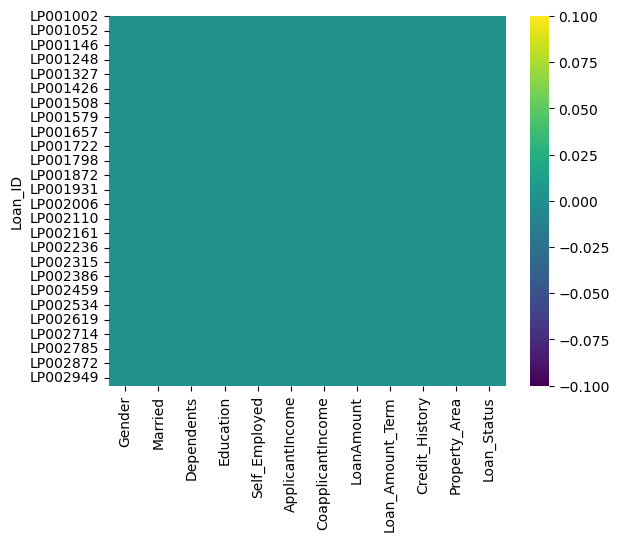

In [13]:
# Visualizing null values by heatmap
sns.heatmap(df.isnull(), cmap= 'viridis')
plt.show()

Here we can see there is no missing value present now in  any column.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [15]:
# Let's loop through each column to get value counts

for col in df.columns:
    print("Value counts for{col}:")
    print(df[col].value_counts())

Value counts for{col}:
Male      502
Female    112
Name: Gender, dtype: int64
Value counts for{col}:
Yes    401
No     213
Name: Married, dtype: int64
Value counts for{col}:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Value counts for{col}:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Value counts for{col}:
No     532
Yes     82
Name: Self_Employed, dtype: int64
Value counts for{col}:
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
Value counts for{col}:
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
Value counts for{col}:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000     

In [16]:
#  Now loop through each column to get unique values
for col in df.columns:
    print("Unique values in {col}:")
    print(df[col].unique())

Unique values in {col}:
['Male' 'Female']
Unique values in {col}:
['No' 'Yes']
Unique values in {col}:
['0' '1' '2' '3+']
Unique values in {col}:
['Graduate' 'Not Graduate']
Unique values in {col}:
['No' 'Yes']
Unique values in {col}:
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  269

In [17]:
# convert object data type to categorical data
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')

In [18]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

Now we have convert datatype from ojbect to category.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    category
 1   Married            614 non-null    category
 2   Dependents         614 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    category
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    float64 
 8   Loan_Amount_Term   614 non-null    float64 
 9   Credit_History     614 non-null    float64 
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1)
memory usage: 33.9+ KB


# Description Of Dataset

In [20]:
# Statistical Summary of numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable. These measures helps to summarize distribution and characteristics of the data in each column, providing insights of range, central tendency, and variability of the values.

Breakdown: Explaination of above statistics

1. Count: Count represents the number of non-null values in the column. Like here, if we consider the "ApplicantIncome" column, the count is 614, which means there are 614 non-null values in that column.

2. Mean: Mean, also known as the average, is the sum of all values in the column divided by the number of values. Same as above, in the "ApplicantIncome" column, the mean is approximately 5403.46. It represents the average income of the applicants.

3. Standard Deviation: Standard deviation measures the spread or dispersion of the values around the mean. It provides information about the variability of the data. Taking "ApplicantIncome" column as a example, the standard deviation is approximately 6109.04. This suggests that the income values of the applicants vary widely from the mean.

4. Min: Min represents the minimum value in the column, i.e., the smallest value present. For example, in the "ApplicantIncome" column, the minimum income is 150. This is the lowest income among all the applicants.

5. 25% (First Quartile): The first quartile represents the value below which 25% of the data falls. For example, in the "ApplicantIncome" column, the first quartile is 2877.50. This means that 25% of the applicants have an income of 2877.50 or lower.

6. 50% (Median): The median represents the middle value of the dataset when it is sorted in ascending order. For example, in the "ApplicantIncome" column, the median is 3812.50. This means that 50% of the applicants have an income of 3812.50 or lower.

7. 75% (Third Quartile): The third quartile represents the value below which 75% of the data falls. Like here, in the "ApplicantIncome" column, the third quartile is 5795.00. This means that 75% of the applicants have an income of 5795.00 or lower.

8. Max: Max represents the maximum value in the column, i.e., the largest value present. Here, in the "ApplicantIncome" column, the maximum income is 81000. This is the highest income among all the applicants.

These statistics provide insights into the distribution and range of the data in each column, helping us understand the characteristics of each columns.

# Data Visualization- Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data.

Univariate Analysis

Here, to perform univariate analysis in numerical column we will be using Histogram plot, Density plot,and boxplot. Using a bar plot to each categorical column and will see the distribution, skewness and presence of outliers in the data present in each columns.

'Numerical Columns'

1. 'ApplicantIncome'

<function matplotlib.pyplot.show(close=None, block=None)>

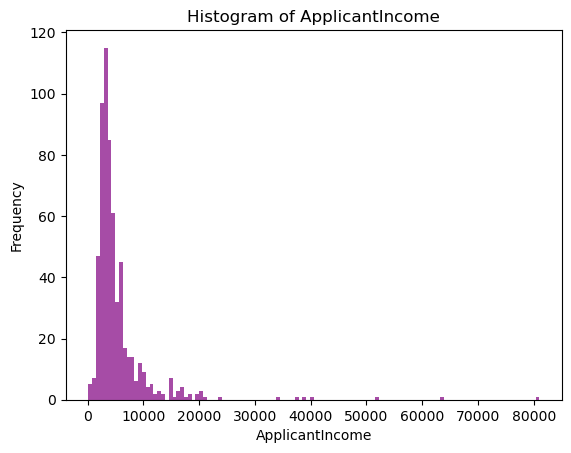

In [21]:
# Let's analyze the 'ApplicantIncome' column by using histogram plot

plt.hist(df['ApplicantIncome'], bins= 'auto', color= 'purple', alpha=0.7)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of ApplicantIncome')
plt.show

Here we can see the peak is around the range of 0-1000, even almost all the values are accumulated there, that means data is right skewed .

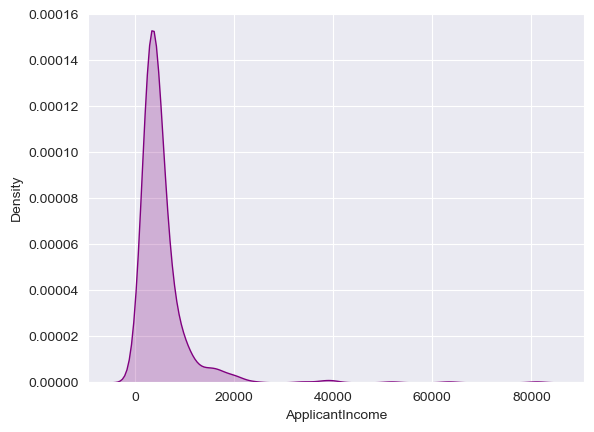

In [22]:
# Analyze Density plot

sns.set_style("darkgrid")
sns.kdeplot(df['ApplicantIncome'], shade= True, color='purple')
plt.show()

Here we can clearly see the data is positively skewed.

2. 'CoapplicantIncome'

<function matplotlib.pyplot.show(close=None, block=None)>

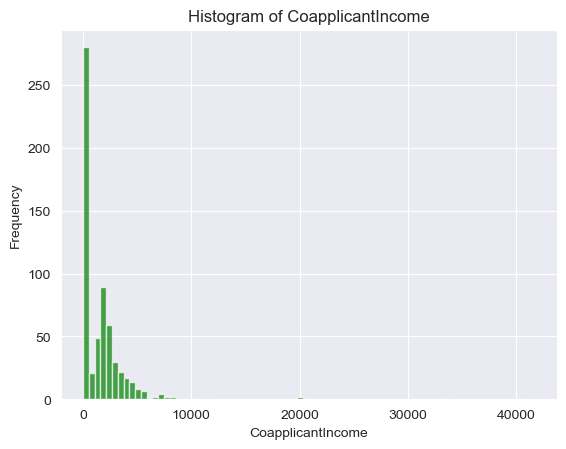

In [23]:
# Let's analyze the 'CoapplicantIncome' column by using histogram plot

plt.hist(df['CoapplicantIncome'], bins= 'auto', color= 'green', alpha=0.7)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.title('Histogram of CoapplicantIncome')
plt.show

Here we can see the peak is at 0 and values spreaded till 1000, which shows skewness and can see few values far from frequent values.

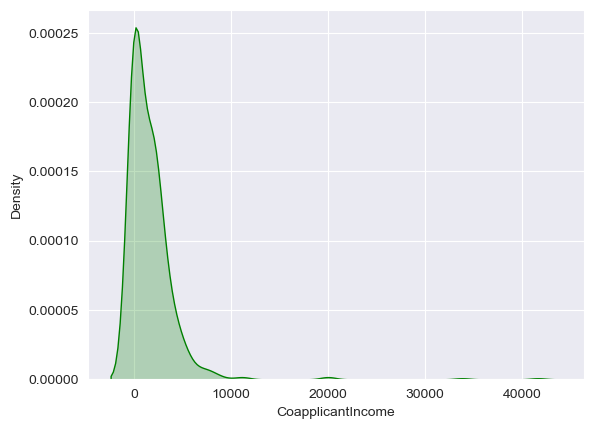

In [24]:
# Analyze Density plot

sns.set_style("darkgrid")
sns.kdeplot(df['CoapplicantIncome'], shade= True, color='green')
plt.show()

Here we can see rightly skewed distribution with outliers.

3. 'LoanAmount'

<function matplotlib.pyplot.show(close=None, block=None)>

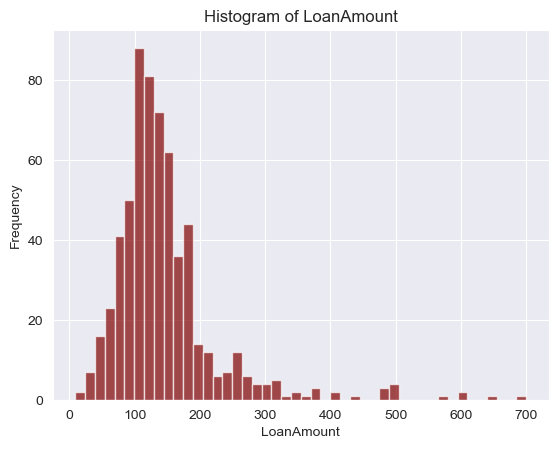

In [25]:
# Let's analyze the 'LoanAmount' column by using histogram plot

plt.hist(df['LoanAmount'], bins= 'auto', color= 'maroon', alpha=0.7)
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Histogram of LoanAmount')
plt.show

Here we can see the peak is at 100, that means most frequent values are from this amount,can also see few values far from frequent values.

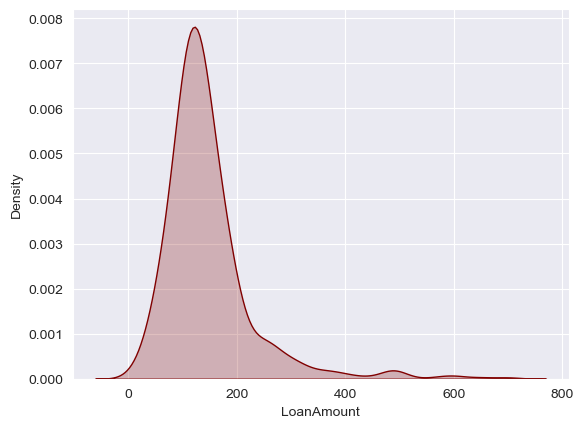

In [26]:
# Analyze Density plot

sns.set_style("darkgrid")
sns.kdeplot(df['LoanAmount'], shade= True, color='maroon')
plt.show()

Here we can see the distribution is rightly skewed.

4. 'Loan_Amount_Term'

<function matplotlib.pyplot.show(close=None, block=None)>

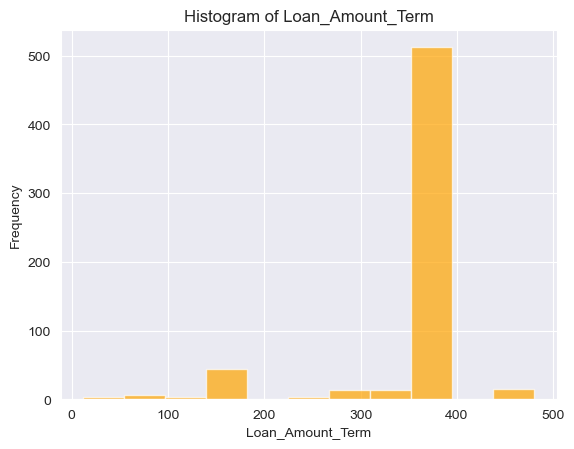

In [27]:
# Let's analyze the 'Loan_Amount_Term' column by using histogram plot

plt.hist(df['Loan_Amount_Term'], bins= 'auto', color= 'orange', alpha=0.7)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Histogram of Loan_Amount_Term')
plt.show

Here we can see peak is between 300-400 range.

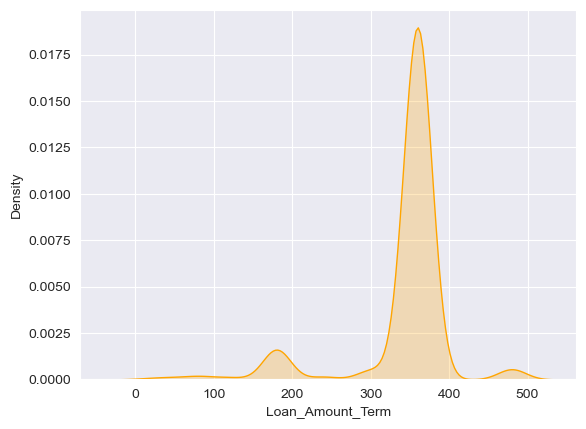

In [28]:
# Analyze Density plot

sns.set_style("darkgrid")
sns.kdeplot(df['Loan_Amount_Term'], shade= True, color='orange')
plt.show()

Here we can see the distribution is leftly skewed.

5. 'Credit_History'

<function matplotlib.pyplot.show(close=None, block=None)>

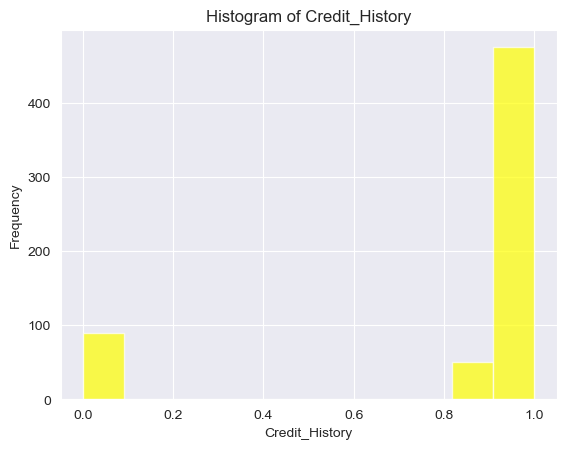

In [29]:
# Let's analyze the 'Credit_History' column by using histogram plot

plt.hist(df['Credit_History'], bins= 'auto', color= 'yellow', alpha=0.7)
plt.xlabel('Credit_History')
plt.ylabel('Frequency')
plt.title('Histogram of Credit_History')
plt.show

Here we can see peak is at 1, but distribution is uneven.

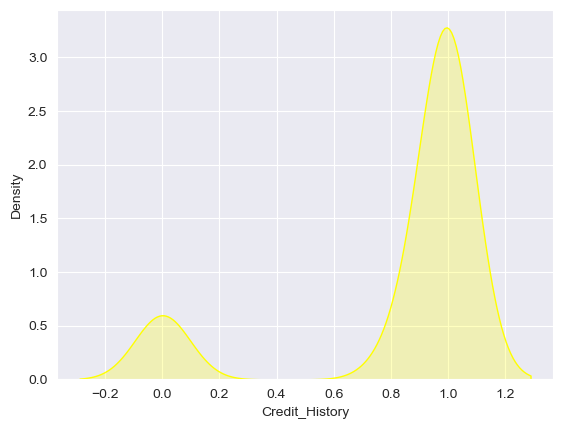

In [30]:
# Analyze Density plot

sns.set_style("darkgrid")
sns.kdeplot(df['Credit_History'], shade= True, color='yellow')
plt.show()

Here we can see bimodal distribution.

'Categorical Columns'

1. 'Gender'

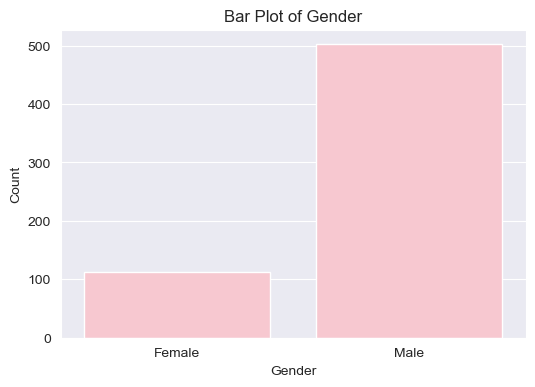

In [31]:
# Let's visualize the 'Gender' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, color='pink')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender')
plt.show()

Here we can see male count is more than female.

2. 'Married'

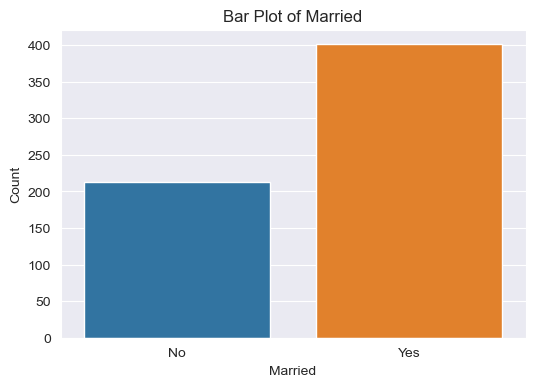

In [32]:
# Let's visualize the 'Married' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Married', data=df)
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Bar Plot of Married')
plt.show()

Here we can see count of married are more than unmarried.

3. 'Dependents'

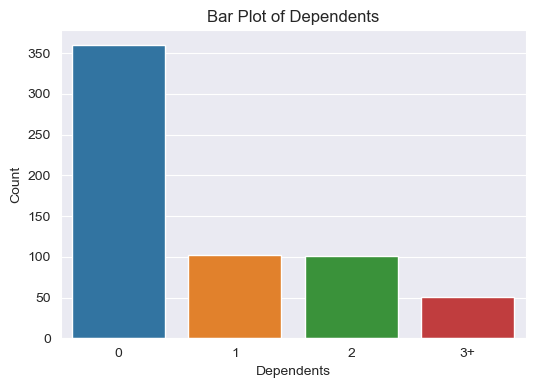

In [33]:
# Let's visualize the 'Dependents' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', data=df)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Bar Plot of Dependents')
plt.show()

Here we can see the count of 0 dependents on applicants is the highest followed by 1,2,& 3.

4. 'Education'

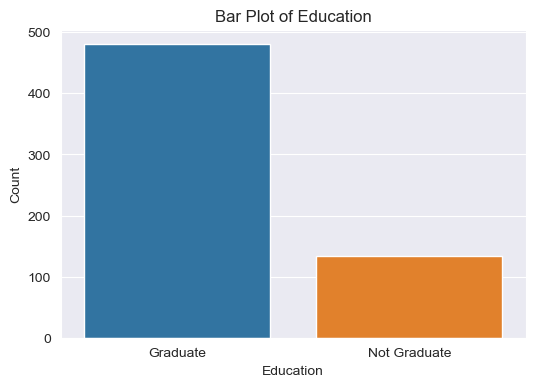

In [34]:
# Let's visualize the 'Education' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Plot of Education')
plt.show()

Here we can see more graduate applicants are there than non-graduate.

5. 'Self_Employed'

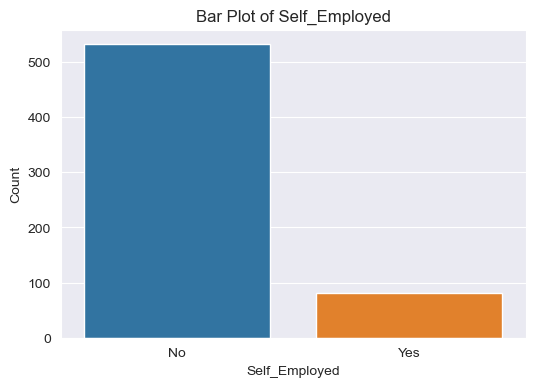

In [35]:
# Let's visualize the 'Self_Employed' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Self_Employed', data=df)
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Bar Plot of Self_Employed')
plt.show()

Here we can analyze that less number of applicants are self employed.

6.'Property_Area'

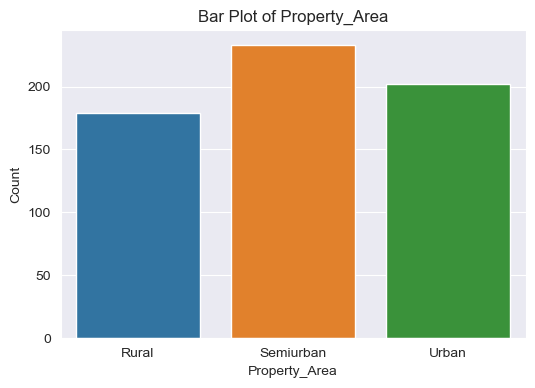

In [36]:
# Let's visualize the 'Property_Area' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', data=df)
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Bar Plot of Property_Area')
plt.show()

Here we can see the applicant having property_area in semiurban are the highest followed by urban, and rural.

7. 'Loan_Status'

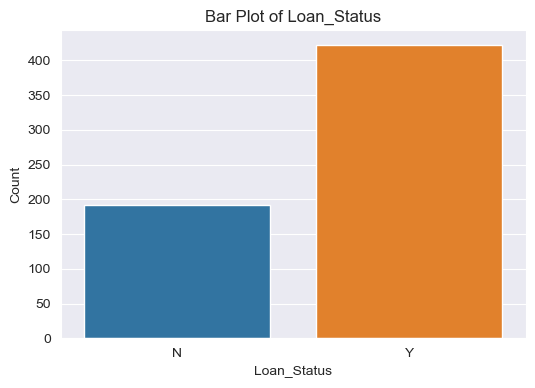

In [37]:
# Let's visualize the 'Loan_Status' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Bar Plot of Loan_Status')
plt.show()

Here we can see applicants having yes loan status is more in numbers than no.

Bivariate Analysis

We will be using bar plot or group bar plot to visualize between two variables.

1. 'Loan_Status' vs 'ApplicantIncome'

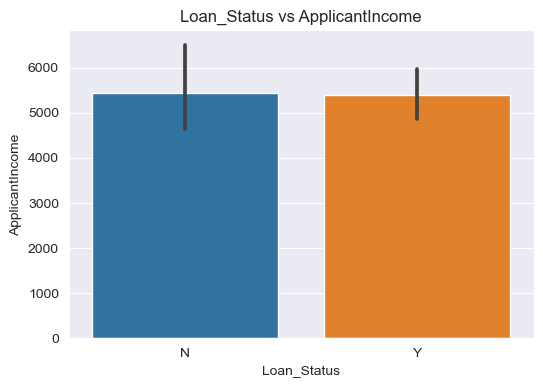

In [38]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, x= 'Loan_Status', y= 'ApplicantIncome')
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.title('Loan_Status vs ApplicantIncome')
plt.show()

Here we can see analysis suggests that, on average, the applicant income for rejected loan applications is slightly higher than for approved loan applications.

2. 'Loan_Status' vs 'CoapplicantIncome'

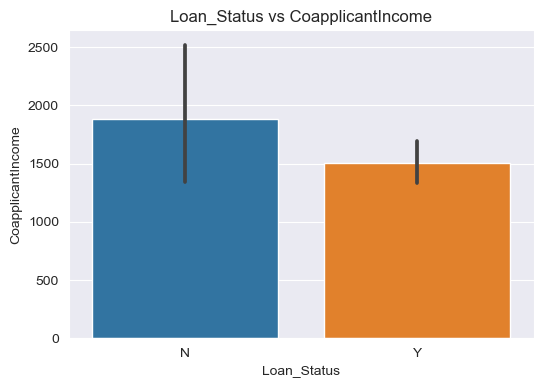

In [39]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, x= 'Loan_Status', y= 'CoapplicantIncome')
plt.xlabel('Loan_Status')
plt.ylabel('CoapplicantIncome')
plt.title('Loan_Status vs CoapplicantIncome')
plt.show()

Here we can see analysis suggests that, on average, the coapplicant income of rejected loan applications is higher than for approved loan applications.

3. 'Loan_Status' vs 'LoanAmount'

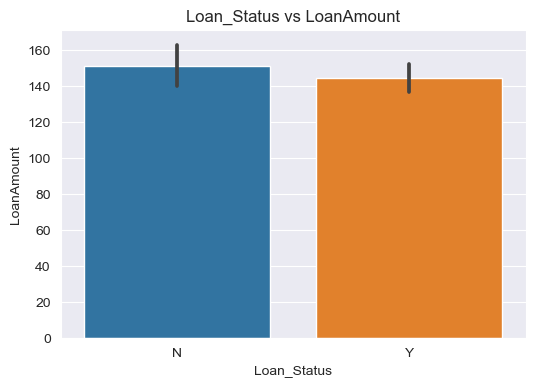

In [40]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, x= 'Loan_Status', y= 'LoanAmount')
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan_Status vs LoanAmount')
plt.show()

Here we can see analysis suggests that, on average, LoanAmount of rejected loan applications is slightly higher than for approved loan applications.

4. 'Loan_Status' vs 'Loan_Amount_Term'

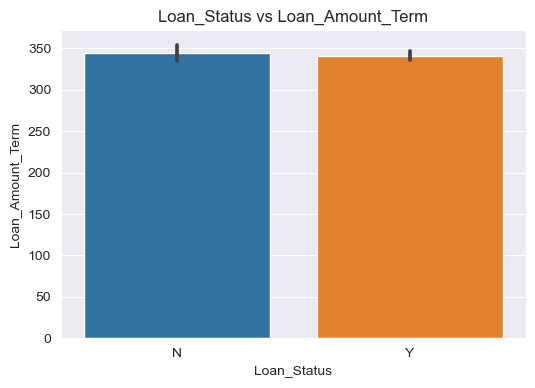

In [41]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, x= 'Loan_Status', y= 'Loan_Amount_Term')
plt.xlabel('Loan_Status')
plt.ylabel('Loan_Amount_Term')
plt.title('Loan_Status vs Loan_Amount_Term')
plt.show()

Here we can see analysis suggests that, on average, the Loan_Amount_Term of rejected loan applications is slightly higher than for approved loan applications.

5. 'Loan_Status' vs 'Credit_History'

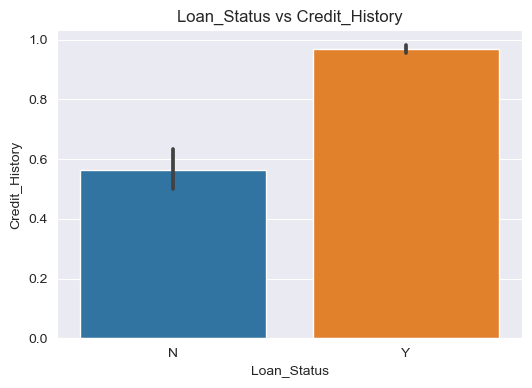

In [42]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, x= 'Loan_Status', y= 'Credit_History')
plt.xlabel('Loan_Status')
plt.ylabel('Credit_History')
plt.title('Loan_Status vs Credit_History')
plt.show()

Here we can see analysis suggests that, on average,  Credit_History of Approved loan applications higher than rejected loan applications.

6. 'Loan_Status' vs 'Gender'

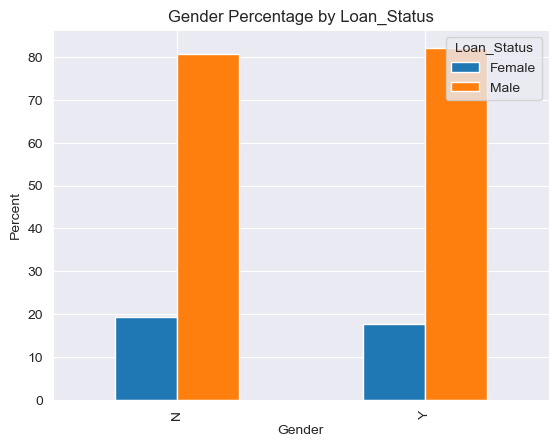

In [43]:
cross_tab = pd.crosstab(df['Loan_Status'], df['Gender'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Percent')
plt.title('Gender Percentage by Loan_Status')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

Here we can see here loan status percentage of male is likely to be higher in approval than rejected, while loan status of female is likely to be higher in rejected than approval.

7. 'Loan_Status' vs 'Married'

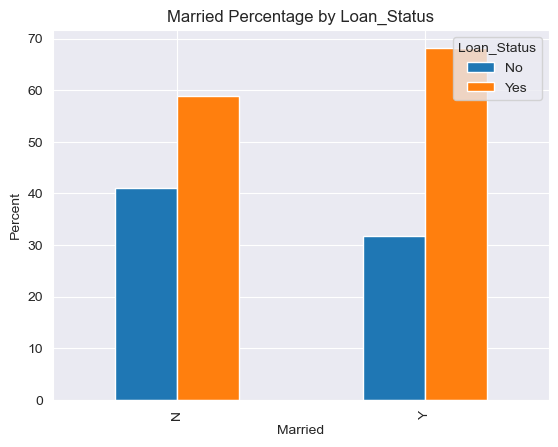

In [44]:
cross_tab = pd.crosstab(df['Loan_Status'], df['Married'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Percent')
plt.title('Married Percentage by Loan_Status')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

Here we can see here loan status percentage of married is likely to be higher in approval than rejected, while loan status percentage of female is likely to be higher in rejected than approval.


8. 'Loan_Status' vs 'Education'

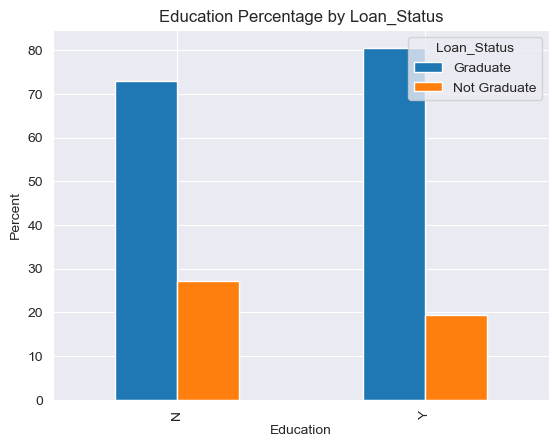

In [45]:
cross_tab = pd.crosstab(df['Loan_Status'], df['Education'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Percent')
plt.title('Education Percentage by Loan_Status')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

Here we can see here loan status percentage of graduate is likely to be higher in approval than rejected, while loan status of not graduate is likely to be higher in rejected than approval.

9. 'Loan_Status' vs 'Self_Employed'

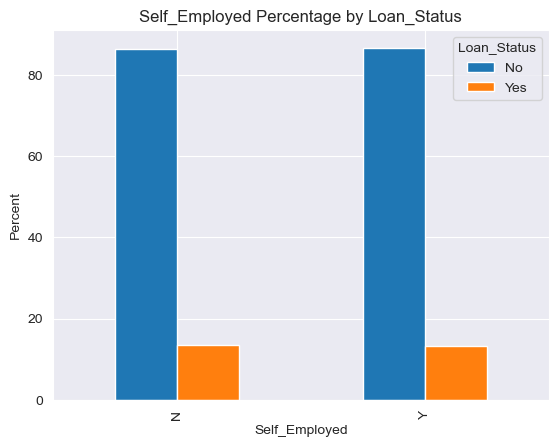

In [46]:
cross_tab = pd.crosstab(df['Loan_Status'], df['Self_Employed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Self_Employed')
plt.ylabel('Percent')
plt.title('Self_Employed Percentage by Loan_Status')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

Here we can see here loan status percentage of self employed and not self employed is likely to be equal in approval and even in  rejected.

10. 'Loan_Status' vs 'Property_Area'

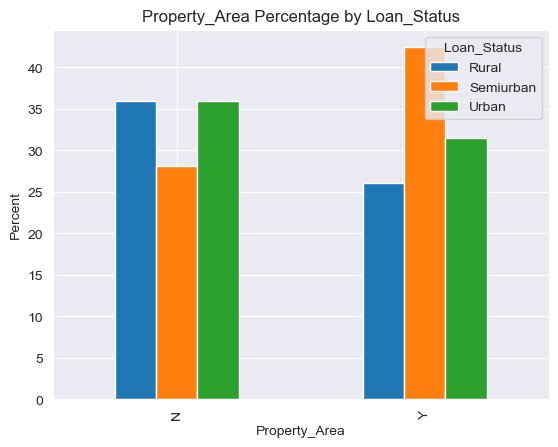

In [47]:
cross_tab = pd.crosstab(df['Loan_Status'], df['Property_Area'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Property_Area')
plt.ylabel('Percent')
plt.title('Property_Area Percentage by Loan_Status')
plt.legend(title='Loan_Status', loc='upper right')
plt.show()

Here we can see loan status percentage of semiurban is likely to be highest in approval than rejected, while rural and urban percentage is higher and equal in rejected than approval.

Multivariate Analysis

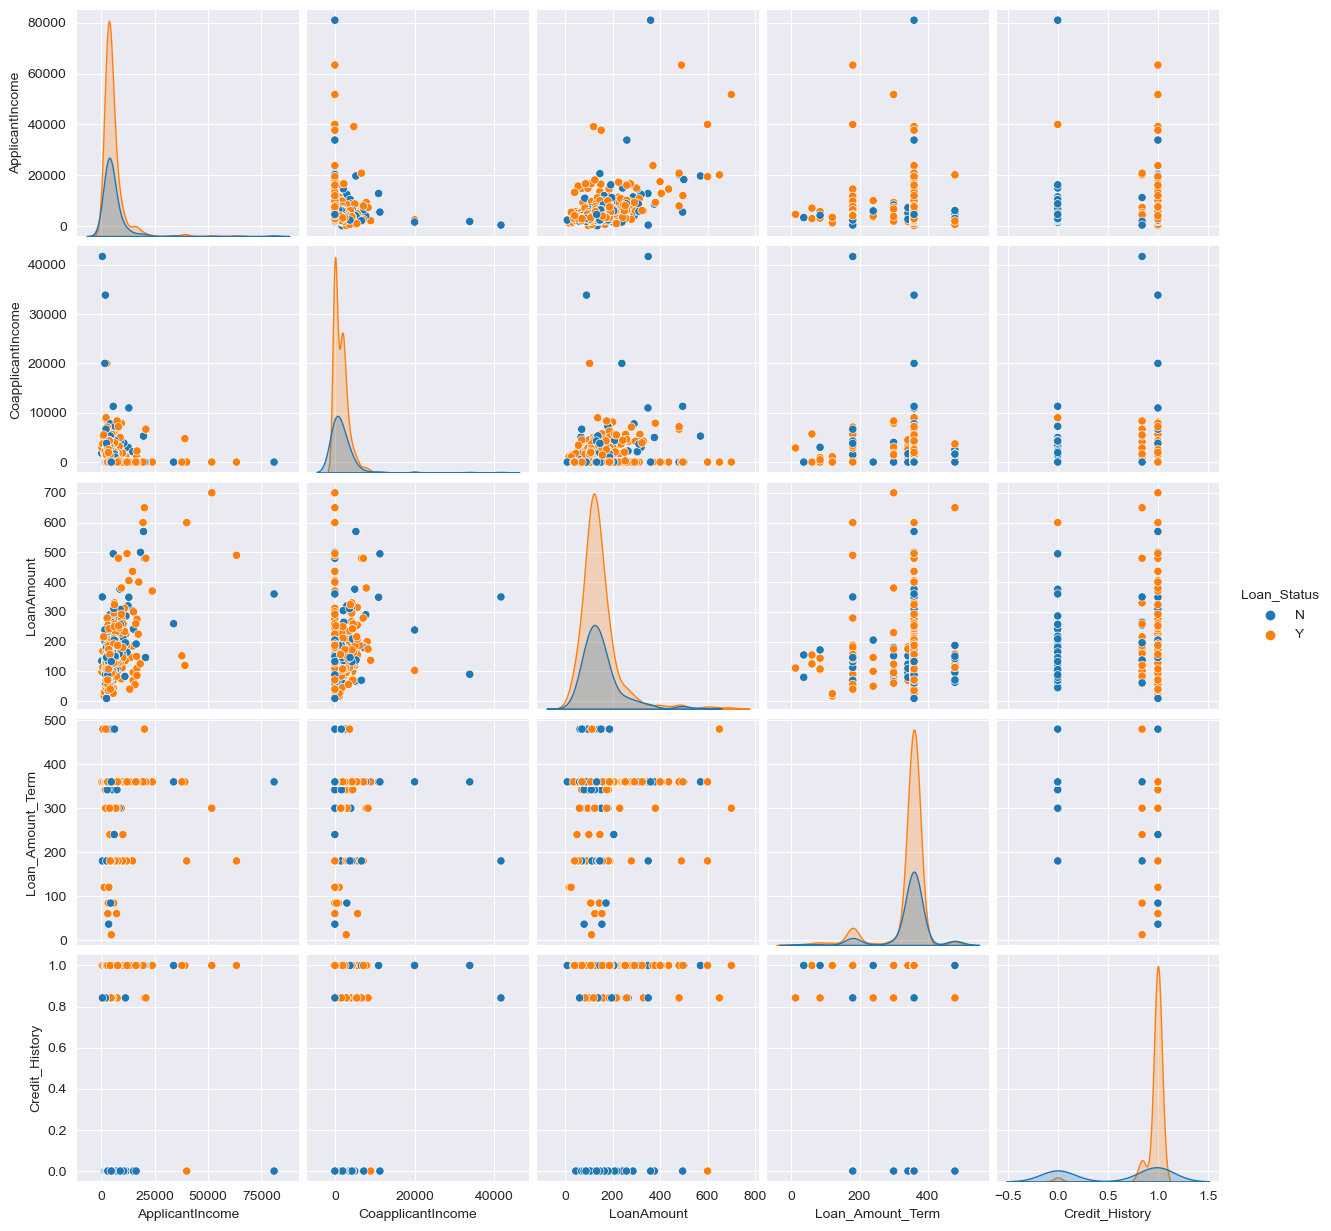

In [48]:
# Using pairplot

sns.pairplot(data= df, hue= 'Loan_Status')

Here we can see no exact relation. Let's move for further analysis.

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here to mitigate the impact of outliers and extreme observations on the analysis and avoid causing data loss.

For this we will be importing necessary library first from scipy.stats.mstats

Winsorizing Method: Winsorizing is a data transformation technique used to handle outliers or extreme values in a dataset. It involves replacing extreme values with less extreme values, thereby reducing the impact of outliers on statistical analysis. In winsorizing, we will be trimming or censoring the extreme values by replacing them with the value which is closer to rest of the data. It helps in reducoing the impact of outliers on the statistical measures and provides a more robust analysis.It ensures that extreme values do not unduly influence the results or skew the distribution of the data.

In [49]:
df.shape

(614, 12)

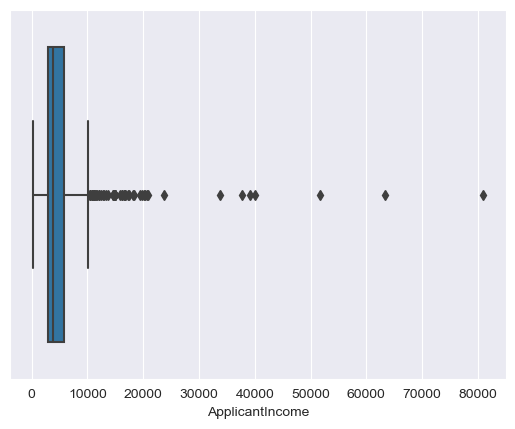

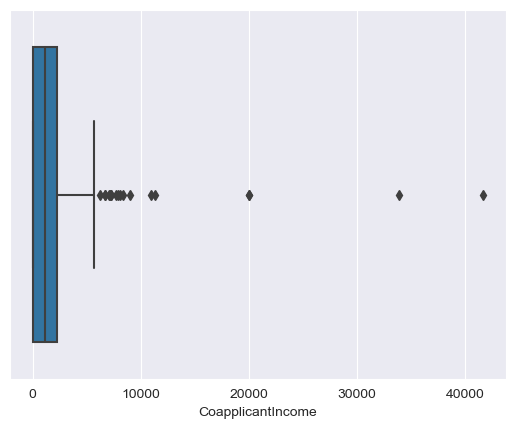

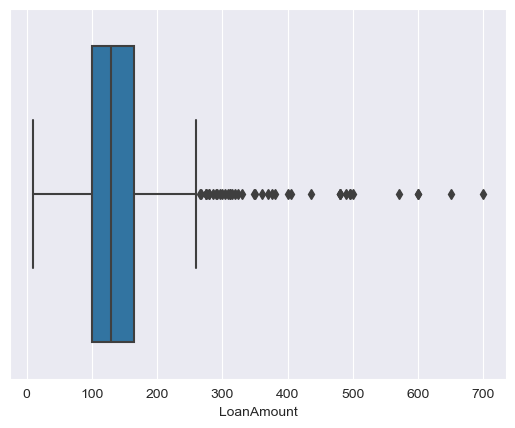

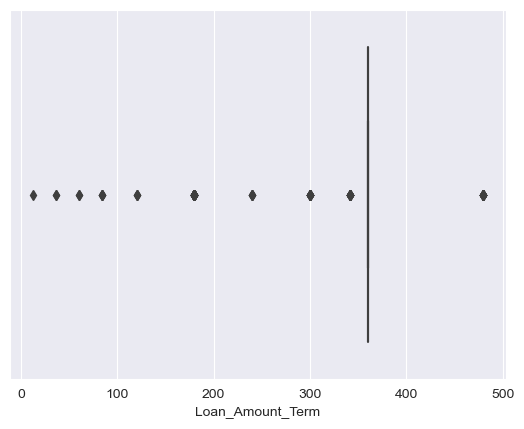

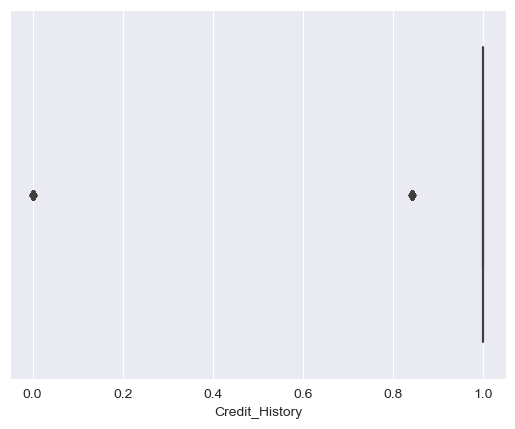

In [50]:
# Lets check the outliers

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [51]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

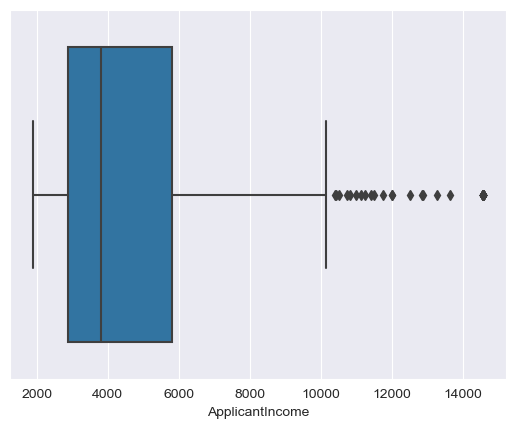

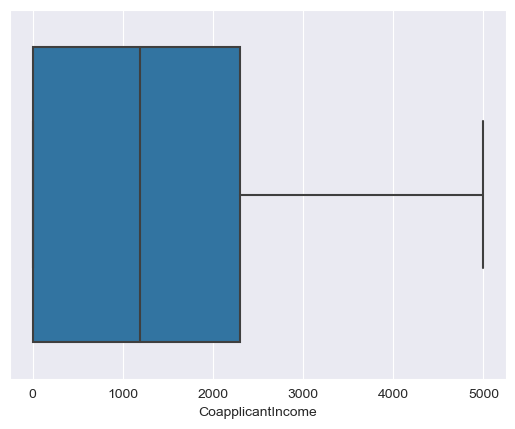

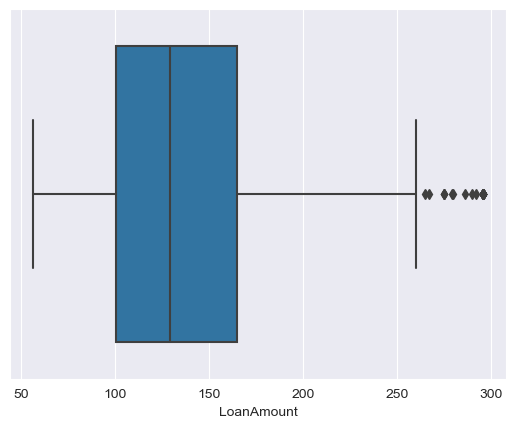

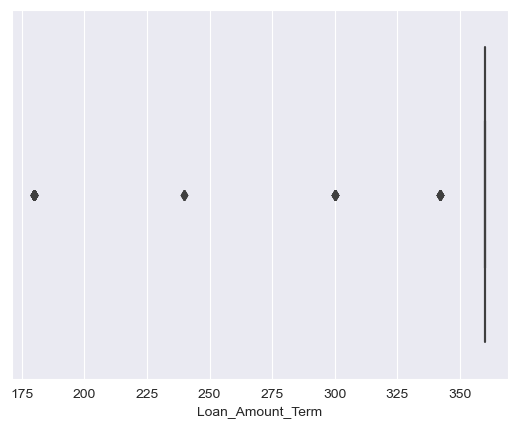

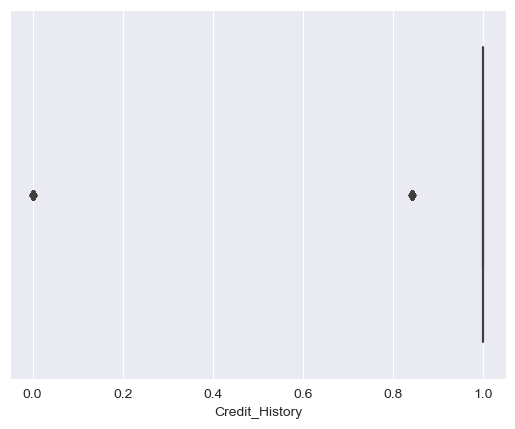

In [52]:
# Lets check the outliers

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

As we have treated outliers, and clipped the extreme values, by such way we have handled them possibly. But let's drop 'Loan_Amount_Term' column, as it shows no Variability and have extreme outliers.

In [53]:
df= df.drop(['Loan_Amount_Term'], axis= 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,56.000000,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,1.0,Urban,Y


In [54]:
df.shape

(614, 11)

# Skewness

Here we will be checking for skewness and those values which are not in the range of -0.5 to +0.5, will be handling them.

We will be using Yeo-johnson transformation technique to handle the skewness in the column.

Yeo-Johnson transformation: It is a statistical measure and a power transformation technique used to transform a non-normal distribution into a distribution that closely resembles a normal distribution. It is a extension to Boxcox transformation. It involves applying power transformation to the original data. It helps in improving the model's performance. Implementing the Yeo-Johnson transformation in Python can be done using libraries such as SciPy or scikit-learn, using 'from sklearn.preprocessing import PowerTransformer' .

In [55]:
df.skew()

ApplicantIncome      1.762446
CoapplicantIncome    0.845835
LoanAmount           1.054139
Credit_History      -1.963600
dtype: float64

In [56]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# Round transformed values to 2 decimal places
df[columns] = df[columns].round(2)

In [57]:
df.skew()

ApplicantIncome      0.072792
CoapplicantIncome   -0.167739
LoanAmount           0.004039
Credit_History      -1.602716
dtype: float64

# Encoding Categorical Columns

Here we will be using Label encoder method to encode the categorical column into numerical column.

Label Encoder: Label encoding assigns numerical labels to each unique category in a categorical variable using integers starting from 0.The labels are assigned in an ordinal manner, which means that the labels are ordered based on the alphabetical or numerical order of the categories.

For this we will be importing library from 'sklearn.preprocessing import LabelEncoder'

Lets encode categorical columns.

In [58]:
df.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Credit_History        float64
Property_Area        category
Loan_Status          category
dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['category']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [60]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,0.75,-1.11,0.30,0.51,2,1
LP001003,1,1,1,0,0,0.32,0.76,-0.03,0.51,0,0
LP001005,1,1,0,0,1,-0.57,-1.11,-1.64,0.51,2,1
LP001006,1,1,0,1,0,-0.94,0.91,-0.18,0.51,2,1
LP001008,1,0,0,0,0,0.79,-1.11,0.21,0.51,2,1
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,-0.65,-1.11,-1.47,0.51,0,1
LP002979,1,1,3,0,0,0.11,-1.11,-2.04,0.51,0,1
LP002983,1,1,1,0,0,1.23,0.20,1.63,0.51,2,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 73.7+ KB


In [63]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,-0.000326,-0.001515,0.000635,-0.003257,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1.000933,1.002992,1.000823,0.999856,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.840000,-1.110000,-2.040000,-2.250000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.670000,-1.110000,-0.622500,0.510000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-0.040000,0.685000,-0.010000,0.510000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.730000,0.900000,0.587500,0.510000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.910000,1.170000,2.020000,0.510000,2.000000,1.000000


# Correlation Between Target And Independent Variable

Now here, we will be checking the correlation matrix which shows the relation between target and independent variable. We will get it by using df.corr() function. We will be finding the correlation to know which feature is more positive or negatively correlated to the target vaiable, which will be helping us for the feature selction to avoid overfitting. We will also be visualizing this correlation with using heatmap. And will be using seaborn library for heatmap.

In [64]:
# Lets check correlation

df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.070268,0.222320,0.151364,0.019947,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.011224,0.317618,0.192314,-0.005287,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.130479,-0.006408,0.162445,-0.029591,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.197349,0.041756,-0.155965,-0.083094,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.201767,-0.091085,0.109151,-0.003656,-0.030860,-0.003700
ApplicantIncome,0.070268,0.011224,0.130479,-0.197349,0.201767,1.000000,-0.379098,0.509081,0.049179,-0.059880,0.002345
CoapplicantIncome,0.222320,0.317618,-0.006408,0.041756,-0.091085,-0.379098,1.000000,0.151806,-0.011141,-0.059928,0.062009
LoanAmount,0.151364,0.192314,0.162445,-0.155965,0.109151,0.509081,0.151806,1.000000,-0.018005,-0.090545,-0.045453
Credit_History,0.019947,-0.005287,-0.029591,-0.083094,-0.003656,0.049179,-0.011141,-0.018005,1.000000,-0.009976,0.512861
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.059880,-0.059928,-0.090545,-0.009976,1.000000,0.032112


In [65]:
correlation_matrix= df.corr()
Loan_Status_correlation= correlation_matrix['Loan_Status']
print(Loan_Status_correlation)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome      0.002345
CoapplicantIncome    0.062009
LoanAmount          -0.045453
Credit_History       0.512861
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


# Visualization Of Correlation Matrix

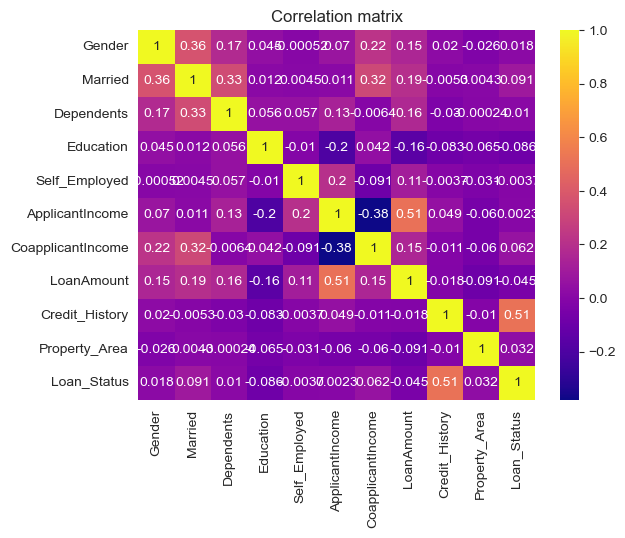

In [66]:
# Let's visualize the relation by using heatmap

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation matrix')
plt.show()

# Feature Engineering

Now we will be defining the target and independent variable, so that it will be clear what to predict on what basis. Then we will proceed with the feature scaling process using MinMaxScaler from sklearn.preprocessing.

Feature Scaling: It is performed to bring all the features to a similar scale or value range. It basically helps in improving the performance, convergence, and interpretability of ML algorithm. It ensures that all features should be treated equally during the modeling.

MinMaxScaler: This technique used to transform features by scaling them to a specified range which should be between 0-1. It ensures that all features are scaled proportionally. This technique is useful to preserve the shape of the original distribution while bringing all features to a common scale.

After this we will proceed with checking out for multicollinearity by finding the vif(variation inflation factor) values. For this we will be importing statsmodels.api and then from statsmodels.stats.outliers_inflation importing variance_inflation_factor to find out the vif values for the features.

A vif value 1 indicates no multicollinearity, while values greater than 1 suggest increasing multicollinearity. Generally , vif value above 5 or 10 is considered very high, so in that case we need to handle the multicollinearity.

If we will find any value above range we will be handling that by dropping one or two column with high multicollinearity, an will also be adding constant term for calculating vif. A constant term will allow and help us for a more accurate assessment of multicollinearity and its impact on predictor variable.

After handling multicollinearity issue, we will proceed with finding the Best Random State, which will ensure that further operations should be reproducible. Here we will be using logistic regression algorithm for classification tasks to generate the best random state. The genrated best random score by this alogorithm should be used in all further runs for results reproducibility.

We will have to balance the target variable if there is any imbalance, and in that case we will be using RandomOverSampler technique.

Now we will be spliting the data into train and test so that we can train models on train data and can check its performance on test data. As We have a limited observation so, we will be taking "test size- 0.2", rest will be used as train data to train the model.

# Target and Independent Variable

In [67]:
# Define Target and Independent Variable

y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Loan_Status
Target variable dimensions:  (614,)

Features variables names:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']
Features variables dimensions:  (614, 10)


# Feature Selection

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

# Initialize the model
model= LogisticRegression()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Gender', 'Married', 'Education', 'LoanAmount', 'Credit_History'], dtype='object')


In [69]:
fit_score = rfe.ranking_
print("Fit Score:")
print(fit_score)

# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print("Feature Rankings:")
print(feature_rankings)

Fit Score:
[1 1 6 1 5 3 2 1 1 4]
Feature Rankings:
             Feature  Ranking
0             Gender        1
1            Married        1
3          Education        1
7         LoanAmount        1
8     Credit_History        1
6  CoapplicantIncome        2
5    ApplicantIncome        3
9      Property_Area        4
4      Self_Employed        5
2         Dependents        6


# Feature Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0    0.000000        0.0            0.0         0.690667   
1       1.0      1.0    0.333333        0.0            0.0         0.576000   
2       1.0      1.0    0.000000        0.0            1.0         0.338667   
3       1.0      1.0    0.000000        1.0            0.0         0.240000   
4       1.0      0.0    0.000000        0.0            0.0         0.701333   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0    0.000000        0.0            0.0         0.317333   
610     1.0      1.0    1.000000        0.0            0.0         0.520000   
611     1.0      1.0    0.333333        0.0            0.0         0.818667   
612     1.0      1.0    0.666667        0.0            0.0         0.794667   
613     0.0      0.0    0.000000        0.0            1.0         0.576000   

     CoapplicantIncome  LoanAmount  Credit_History 

# Variance Inflation Factor(VIF)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                   X       VIF
0             Gender  6.054540
1            Married  4.001866
2         Dependents  1.815612
3          Education  1.270585
4      Self_Employed  1.206322
5    ApplicantIncome  7.882001
6  CoapplicantIncome  3.394457
7         LoanAmount  8.557946
8     Credit_History  4.537452
9      Property_Area  2.371065


All vif' are in range.

# Value Count Of Target Variable

In [72]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Best Random State

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the model
    lr = LogisticRegression()
    
    # Train the model on the training data
    lr.fit(X_train, y_train)
    
    # Test the model on the testing data and get the accuracy score
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    
    # Get the maximum accuracy score and corresponding random state
    if lr_score > best_score:
        best_score = lr_score
        best_state = state
        best_model = 'Logistic Regression'
    
print(f'Best accuracy score: {best_score}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.8780487804878049
Max random state: 19


Best Accuracy Score is 0.8780487804878049 on Max Random State 19

# Split The Data

In [74]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 10)
(123, 10)
(491,)
(123,)


# Oversampling

In [75]:
from imblearn.over_sampling import RandomOverSampler

# Define the target variable from the features
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the value counts of the resampled target variable
print(y_resampled.value_counts())

1    422
0    422
Name: Loan_Status, dtype: int64


# Modelling

Classification Algorithms

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using classification algorithm as this is the classification problem, where we have to predict the region.

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Logistic Regression will be importing from sklearn.linear_model, DecisionTreeClassifier will be importing from sklearn.tree, RandomForestClassifier,ExtraTreeClassifier, GradientBoostClassifier, AdaBoostClassifier, Bagging Classifier will be importing from sklearn.ensemble, GaussianNB will be importing from sklearn.naive_bayes, KNeighborsClassifier will be importing from sklearn.neighbors .

We will be train our model on each algorithms and will be evaluating the accuracy and the classification report. per On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the accuracy score and the CV score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

# Importing Necessary Libraries for Modelling

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression(LR)

In [77]:
# Initialize and train model
model = LogisticRegression(random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8780487804878049
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.90      0.93      0.92        88

    accuracy                           0.88       123
   macro avg       0.86      0.84      0.85       123
weighted avg       0.88      0.88      0.88       123



Accuracy of this model is 88%

# DecisionTreeClassification(DTC)

In [78]:
# Initialize and train model
model = DecisionTreeClassifier(random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7642276422764228
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.69      0.62        35
           1       0.86      0.80      0.83        88

    accuracy                           0.76       123
   macro avg       0.72      0.74      0.73       123
weighted avg       0.78      0.76      0.77       123



Accuracy of this model is 76%

# RandomForestClassification(RFC)

In [79]:
# Initialize and Train the model
model = RandomForestClassifier(random_state= 19)
model.fit(X_train, y_train)

# Make prediction on test data
y_pred = model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report: \n", report)

Accuracy: 0.8617886178861789
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.88      0.93      0.91        88

    accuracy                           0.86       123
   macro avg       0.84      0.81      0.82       123
weighted avg       0.86      0.86      0.86       123



Accuracy of this model is 86%

# ExtraTreeClassification(ETC)

In [80]:
# Initialize and train model
model = ExtraTreesClassifier(random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8292682926829268
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71        35
           1       0.89      0.86      0.88        88

    accuracy                           0.83       123
   macro avg       0.79      0.80      0.80       123
weighted avg       0.83      0.83      0.83       123



Accuracy of this model is 89%

# GradientBoostionClassification(GBC)

In [81]:
# Initialize and train model
model = GradientBoostingClassifier(random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8455284552845529
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.87      0.92      0.90        88

    accuracy                           0.85       123
   macro avg       0.82      0.79      0.80       123
weighted avg       0.84      0.85      0.84       123



Accuracy of this model is 85%

# AdaBoostClassification(ABC)

In [82]:
# Initialize and train model
model = AdaBoostClassifier(random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8699186991869918
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.88      0.94      0.91        88

    accuracy                           0.87       123
   macro avg       0.86      0.81      0.83       123
weighted avg       0.87      0.87      0.87       123



Accuracy of this model is 87%

# Bagging Classification

In [83]:
# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8780487804878049
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.91      0.92      0.92        88

    accuracy                           0.88       123
   macro avg       0.85      0.85      0.85       123
weighted avg       0.88      0.88      0.88       123



Accuracy of this model is 88%

# KNeighborsClassification(KNN)

In [84]:
# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8780487804878049
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.91      0.92      0.92        88

    accuracy                           0.88       123
   macro avg       0.85      0.85      0.85       123
weighted avg       0.88      0.88      0.88       123



Accuracy of this model is 88%

# SupportVectorClassification(SVC)

In [85]:
# Initialize and train model
model = SVC(kernel='linear', random_state=19)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8455284552845529
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.90      0.89      0.89        88

    accuracy                           0.85       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.85      0.85      0.85       123



Accuracy of this model is 85%

# GaussianNB(GNB)

In [86]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8455284552845529
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.90      0.89      0.89        88

    accuracy                           0.85       123
   macro avg       0.81      0.81      0.81       123
weighted avg       0.85      0.85      0.85       123



Accuracy of this model is 85%

# Cross Validation Score(CV Score)

# Importing Necessary Libraries

In [87]:
from sklearn.model_selection import cross_val_score

# LR

In [88]:
# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))

Cross Validation Score: [0.71717172 0.82653061 0.76530612 0.74489796 0.7755102 ]
Mean CV Score: 0.7658833230261801
Accuracy: 0.8780487804878049
Difference between accuracy score and cross-validation score is: 0.11216545746162476


# DTC

In [89]:
model = DecisionTreeClassifier(random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.67676768 0.65306122 0.76530612 0.67346939 0.60204082]
Mean CV Score: 0.674129045557617
Accuracy: 0.7642276422764228
Difference between accuracy score and cross-validation score is: 0.09009859671880582


# RFC

In [90]:
model = RandomForestClassifier(n_estimators=100, random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.74747475 0.78571429 0.75510204 0.76530612 0.69387755]
Mean CV Score: 0.7494949494949494
Accuracy: 0.8617886178861789
Difference between accuracy score and cross-validation score is: 0.11229366839122945


# ETC

In [91]:
model = ExtraTreesClassifier(n_estimators=100, random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.70707071 0.7244898  0.7755102  0.73469388 0.70408163]
Mean CV Score: 0.7291692434549578
Accuracy: 0.8292682926829268
Difference between accuracy score and cross-validation score is: 0.10009904922796897


# GBC

In [92]:
model = GradientBoostingClassifier(random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.71717172 0.78571429 0.71428571 0.73469388 0.75510204]
Mean CV Score: 0.7413935271078127
Accuracy: 0.8455284552845529
Difference between accuracy score and cross-validation score is: 0.1041349281767402


# ABC

In [93]:
model = AdaBoostClassifier(random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.75757576 0.81632653 0.75510204 0.75510204 0.76530612]
Mean CV Score: 0.769882498453927
Accuracy: 0.8699186991869918
Difference between accuracy score and cross-validation score is: 0.10003620073306485


# Bagging Classifier

In [94]:
model = BaggingClassifier(random_state=19)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.77777778 0.71428571 0.70408163 0.70408163 0.70408163]
Mean CV Score: 0.720861678004535
Accuracy: 0.7886178861788617
Difference between accuracy score and cross-validation score is: 0.0677562081743267


# KNN

In [95]:
model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.74747475 0.80612245 0.74489796 0.76530612 0.71428571]
Mean CV Score: 0.7556173984745413
Accuracy: 0.8780487804878049
Difference between accuracy score and cross-validation score is: 0.12243138201326353


# SVC

In [96]:
model = SVC()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.78787879 0.82653061 0.7755102  0.79591837 0.7755102 ]
Mean CV Score: 0.7922696351267781
Accuracy: 0.8861788617886179
Difference between accuracy score and cross-validation score is: 0.09390922666183987


# GNB

In [97]:
model = GaussianNB()
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.70707071 0.82653061 0.74489796 0.7244898  0.75510204]
Mean CV Score: 0.7516182230467946
Accuracy: 0.8455284552845529
Difference between accuracy score and cross-validation score is: 0.0939102322377583


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is Bagging Classifier with a score of 0.0677562081743267. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

Bagging Classification is the best performing model here.

Let's perform Hyperparameter tuning on best top four performing model to check their accuracy and lets see who performs well.

# Hyperparameter Tuning

# Importing Necessary Library

In [98]:
from sklearn.model_selection import RandomizedSearchCV

# Bagging Classifier

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform

# Define the parameter space for hyperparameter tuning
param_dist = {"n_estimators": randint(10, 200),
              "max_samples": uniform(0.1, 1),
              "max_features": uniform(0.1, 1)}

# Initialize the base estimator for BaggingClassifier
dt = DecisionTreeClassifier()

# Initialize the BaggingClassifier model
bc = BaggingClassifier(dt)

# Initialize the RandomizedSearchCV object
random_bc = RandomizedSearchCV(bc, param_distributions=param_dist, n_iter=100, cv=5, random_state=19)

# Fit the RandomizedSearchCV object to the training data
random_bc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_bc.best_params_)
print("Best Score: ", random_bc.best_score_)

Best Hyperparameters:  {'max_features': 0.7055366411662503, 'max_samples': 0.17536713361265246, 'n_estimators': 63}
Best Score:  0.7922902494331066


# DecisionTree Classifier

In [100]:
# Create the model
dtc = DecisionTreeClassifier(random_state=19)

# Define the parameter distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search CV object
dtc_random = RandomizedSearchCV(dtc, param_distributions=param_dist, cv=5, n_iter=100, random_state=19)

# Fit the randomized search CV object on the data
dtc_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", dtc_random.best_params_)
print("Best score:", dtc_random.best_score_)

Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'entropy'}
Best score: 0.7841682127396413


# SupportVectorClassifier

In [101]:
from scipy.stats import uniform

# Create the SVC model
svc = SVC()

# Define the parameter distribution to sample from
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf']}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 1.1426706863806346, 'kernel': 'rbf'}
Accuracy: 0.8455284552845529


# GaussianNB

In [102]:
from sklearn.naive_bayes import GaussianNB

# Create the model
gnb = GaussianNB()

# Define the parameter distributions to sample from
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create the randomized search CV object
gnb_random = RandomizedSearchCV(gnb, param_distributions=param_dist, cv=5, n_iter=100, random_state=19)

# Fit the randomized search CV object on the data
gnb_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gnb_random.best_params_)
print("Best score:", gnb_random.best_score_)

Best parameters: {'var_smoothing': 1.0}
Best score: 0.7902288188002473


After performing hyperparameter tuning on different modelswe can see that Support Vector classifier is the best performing model with the highest score. Accuracy of SVC is 85%.

# Plotting AUC & ROC

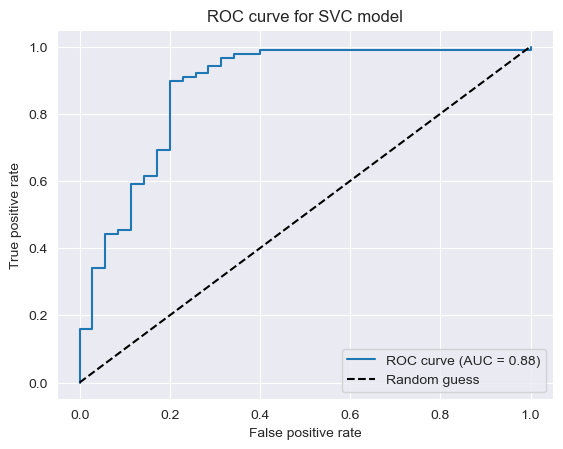

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier model
svc= SVC(probability= True)

# Train the model on the training data
svc.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = svc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for SVC model')
plt.legend(loc='best')
plt.show()

In [104]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Initialize the Decision Tree Classifier model
svc = SVC(probability= True)

# Fit the model on the training set
svc.fit(X_train, y_train)

# Predict probabilities of the positive class (y=1) on the testing set
y_prob = svc.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC) using auc
auc_score = auc(fpr, tpr)

# Print the AUC score
print("AUC-ROC score for SVC model: {:.3f}".format(auc_score))

AUC-ROC score for SVC model: 0.876


Here we have plotted AUC & ROC curve and find AUC score is 87.6%

# Save The Model

In [105]:
# Lets save best performing model

import pickle


# train your model and obtain 'model' object
model= SVC()
model.fit(X_train, y_train)


# save the model using pickle
model_data= {'model': model}
with open('loan_predic_model.pickle', 'wb') as f:
    pickle.dump(model, f)